<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">

# **Cleaning the audio**
#### Data preprocess representation for a single audio file

___

## **Seminar/Case Studies**
Developed by **ManiDeepak P**

Instructor: **Kiran Khatter**

Computer Science & Engineering Dept.

**BML Munjal University,  Gurgaon**





### **LIBRARIES & GOOGLE AUTH**

In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [14]:
%%capture
!pip install pydub
!pip install noisereduce

In [15]:
%%capture
import os
import numpy as np

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import matplotlib.pyplot as plt
from librosa import display   
import IPython.display as ipd 

### **DATA PREPROCESS REPRESENTATION**
This notebook present the data preprocessing for a single audio file.
The preprocess is described in the following diagram:
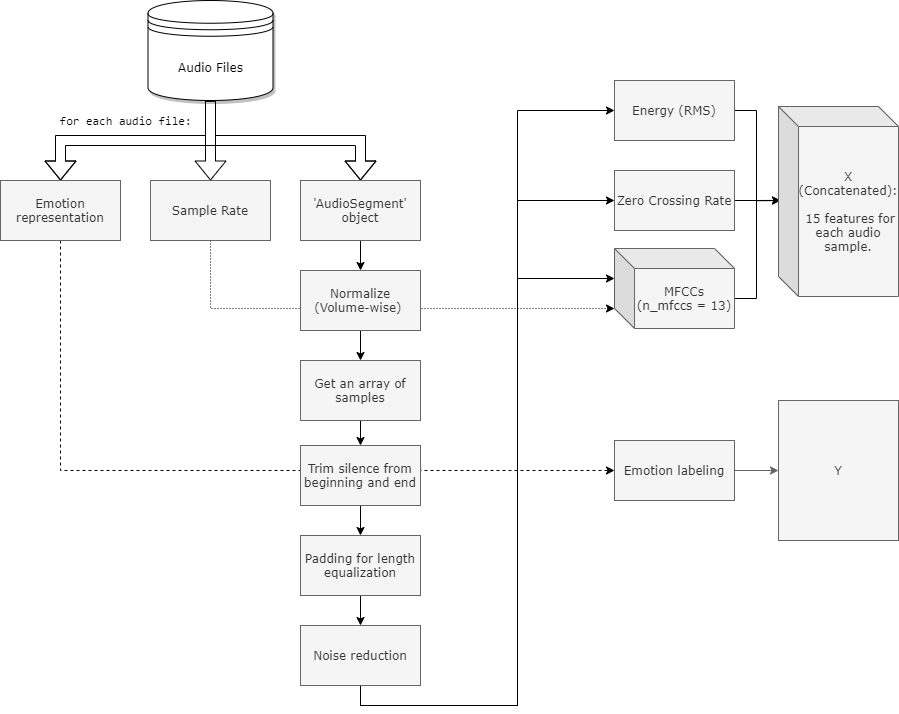

## **Diagram Explanation**
In general, The following data is extracted from each audio file:
1.   **Emotion representation**

    *   RAVDESS: The filename contains a number that represents an emotion, e.g. 03 is happy.
   


2.   **Sample Rate**: number of audio samples per second. RAVDESS database was recorded in 48kHz, and the TESS database was recorded in 22.5kHz. 

3. **The audio** is processed in the following order:


*   'AudioSegment' instance: The audio is loaded to an object by the library 'AudioSegment'.
*   Normalization: Each 'AudioSegment' object is normalized to + 5.0 dBFS. 

*   Transforming the object to an array of samples is crucial for the rest of the preprocessing.
*   Trimming the silence in the beginning and the end, to get rid of unnecessary data.
*   Padding every audio file to the same length, for length equalization.
*   Noise reduction is being performed.
---


## **Audio preprocess for a single file**

In [16]:
# Define file path for a single file.
path = '/content/drive/My Drive/RAVDESS/Actor_02/03-01-01-01-01-01-02.wav'

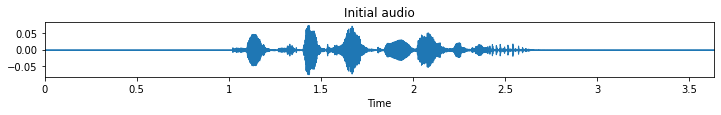

In [17]:
# 1. Load the audio file into an 'AudioSegment' object, and extract the sample rate. 
#    'x' is an array of samples that is only relevant for visualization at this part.

rawsound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveplot(x, sr)
plt.title('Initial audio')

rawsound

The actual audio as well as the 'y' axis range suggests that the initial audio is very low-volumed. This can interfere with the feature extraction validity.




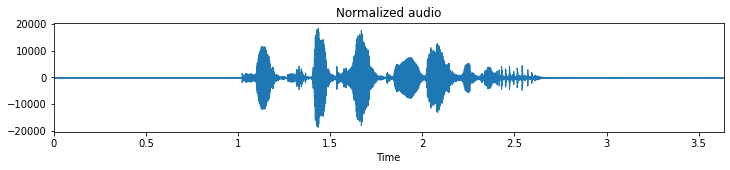

In [18]:
# 2. Normalize to +5.0 dBFS, Transform audio signals to an array.

normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveplot(normal_x, sr)
plt.title('Normalized audio')

normalizedsound

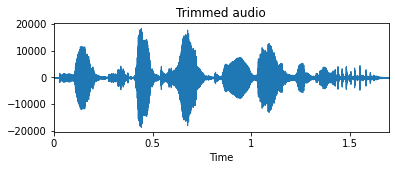

In [19]:
# 3. Trim silence in the beginning and end.

xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveplot(xt, sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

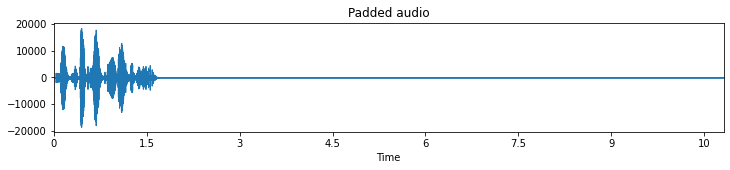

In [20]:
# 4. Right-side padding for length equalization.
#    173056 = maximum lengthed audio (the extraction of this value is performed in the "SpeechEmotionRecognion_Model" notebook.)

padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveplot(padded_x, sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))